In [30]:
%matplotlib inline

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, TSNE

In [136]:
mpg_data = pd.read_fwf('data/auto-mpg.data', header = None, na_vals = ['?'])
mpg_data.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
mpg_data = mpg_data.drop(mpg_data[mpg_data.horsepower == '?'].index)
mpg_data.horsepower = mpg_data.horsepower.astype(float)
mpg_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,"""ford mustang gl"""
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,"""vw pickup"""
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,"""dodge rampage"""
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,"""ford ranger"""


In [137]:
mpg_data_with_car_name = mpg_data.copy()
mpg_data_with_car_name = pd.get_dummies(mpg_data_with_car_name)
mpg_data = mpg_data.drop('car_name', axis = 1)

In [138]:
mpg_data_with_car_name.shape

(392, 309)

In [139]:
mpg_data_with_car_name.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,"car_name_""amc ambassador brougham""","car_name_""amc ambassador dpl""",...,"car_name_""volvo 145e (sw)""","car_name_""volvo 244dl""","car_name_""volvo 245""","car_name_""volvo 264gl""","car_name_""volvo diesel""","car_name_""vw dasher (diesel)""","car_name_""vw pickup""","car_name_""vw rabbit c (diesel)""","car_name_""vw rabbit custom""","car_name_""vw rabbit"""
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [123]:
mpg_data_attributes = mpg_data.drop('mpg', axis = 1)
mpg_data_target = mpg_data['mpg']

In [124]:
mpg_data_attributes

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,8,307.0,130.0,3504.0,12.0,70,1
1,8,350.0,165.0,3693.0,11.5,70,1
2,8,318.0,150.0,3436.0,11.0,70,1
3,8,304.0,150.0,3433.0,12.0,70,1
4,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,1
394,4,97.0,52.0,2130.0,24.6,82,2
395,4,135.0,84.0,2295.0,11.6,82,1
396,4,120.0,79.0,2625.0,18.6,82,1


In [141]:
mpg_data_with_car_name

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,"car_name_""amc ambassador brougham""","car_name_""amc ambassador dpl""",...,"car_name_""volvo 145e (sw)""","car_name_""volvo 244dl""","car_name_""volvo 245""","car_name_""volvo 264gl""","car_name_""volvo diesel""","car_name_""vw dasher (diesel)""","car_name_""vw pickup""","car_name_""vw rabbit c (diesel)""","car_name_""vw rabbit custom""","car_name_""vw rabbit"""
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0,...,0,0,0,0,0,0,0,0,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,0,0,...,0,0,0,0,0,0,1,0,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0,...,0,0,0,0,0,0,0,0,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
pca = PCA()

In [143]:
pca.fit(mpg_data_attributes)

PCA()

In [144]:
pca.components_.shape

(7, 7)

In [145]:
pca = PCA(n_components  = 2)

In [146]:
pca.fit(mpg_data_attributes)

PCA(n_components=2)

In [147]:
pca.components_

array([[ 1.79262233e-03,  1.14341275e-01,  3.89670355e-02,
         9.92673415e-01, -1.35283460e-03, -1.33684138e-03,
        -5.51538021e-04],
       [ 1.33244815e-02,  9.45778439e-01,  2.98248416e-01,
        -1.20752748e-01, -3.48258394e-02, -2.38516836e-02,
        -3.24298106e-03]])

In [148]:
pca = PCA()
pca.fit(mpg_data_attributes)
pca.components_

array([[ 1.79262233e-03,  1.14341275e-01,  3.89670355e-02,
         9.92673415e-01, -1.35283460e-03, -1.33684138e-03,
        -5.51538021e-04],
       [ 1.33244815e-02,  9.45778439e-01,  2.98248416e-01,
        -1.20752748e-01, -3.48258394e-02, -2.38516836e-02,
        -3.24298106e-03],
       [-7.29209804e-03, -3.03257047e-01,  9.48713803e-01,
        -2.45320521e-03, -7.70032425e-02, -4.28162289e-02,
         1.24643867e-02],
       [ 1.42837791e-03, -9.20994584e-03, -4.30779415e-02,
         1.48633490e-03,  5.95372077e-02, -9.97249604e-01,
        -1.94075866e-03],
       [-1.71683641e-02,  1.06092977e-02,  8.64404757e-02,
        -3.15267236e-03,  9.94496232e-01,  5.55064333e-02,
         2.65997449e-03],
       [ 2.85519196e-01,  2.34681580e-03, -9.42467988e-03,
         1.19678424e-04,  3.20939275e-03, -8.78813785e-04,
         9.58317990e-01],
       [ 9.58096063e-01, -1.61707371e-02,  7.42175636e-03,
        -2.91024612e-04,  1.66762346e-02,  2.75161323e-03,
        -2.8539377

In [149]:
pca.explained_variance_ratio_

array([9.97561506e-01, 2.06279691e-03, 3.55947852e-04, 1.49502847e-05,
       3.92231415e-06, 5.16380051e-07, 3.59910740e-07])

first PC explains 99.76% from data variance

In [150]:
np.sum(pca.explained_variance_ratio_)

1.0

In [151]:
np.cumsum(pca.explained_variance_ratio_)

array([0.99756151, 0.9996243 , 0.99998025, 0.9999952 , 0.99999912,
       0.99999964, 1.        ])

In [152]:
pca = PCA(n_components = 2)
mpg_data_attributes_pca = pca.fit_transform(mpg_data_attributes)

In [153]:
mpg_data_attributes.corr()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
cylinders,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model_year,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [154]:
mpg_data_attributes.cov()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
cylinders,2.909696,169.721949,55.348244,1300.424363,-2.375052,-2.171930,-0.781734
displacement,169.721949,10950.367554,3614.033744,82929.100139,-156.994435,-142.572133,-51.800792
horsepower,55.348244,3614.033744,1481.569393,28265.620231,-73.186967,-59.036432,-14.112741
weight,1300.424363,82929.100139,28265.620231,721484.709008,-976.815253,-967.228457,-400.266050
acceleration,-2.375052,-156.994435,-73.186967,-976.815253,7.611331,2.950462,0.472788
model_year,-2.171930,-142.572133,-59.036432,-967.228457,2.950462,13.569915,0.538650
origin,-0.781734,-51.800792,-14.112741,-400.266050,0.472788,0.538650,0.648860


In [155]:
pca.components_[0]

array([ 1.79262233e-03,  1.14341275e-01,  3.89670355e-02,  9.92673415e-01,
       -1.35283460e-03, -1.33684138e-03, -5.51538021e-04])

In [ ]:
# pca.components_[0] = 1.79262233e-03 * cylinders +  1.14341275e-01 * displacement + ...

In [157]:
isomap = Isomap(n_neighbors = 2, n_components = 3)

In [158]:
isomap.fit(mpg_data_attributes)

Isomap(n_components=3, n_neighbors=2)

In [164]:
isomap_coords = isomap.transform(mpg_data_attributes)

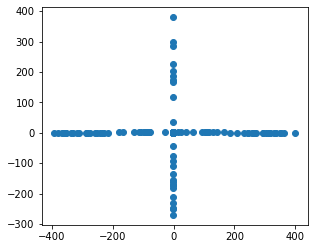

In [173]:
plt.scatter(isomap_coords[:, 0], isomap_coords[:, 1])
plt.gca().set_aspect('equal')
plt.show()

In [167]:
tsne = TSNE(init = 'pca')

In [170]:
mpg_data_tsne = tsne.fit_transform(mpg_data_attributes)

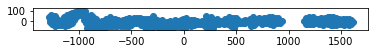

In [172]:
plt.scatter(mpg_data_tsne[:, 0], mpg_data_tsne[:, 1])
plt.gca().set_aspect('equal')
plt.show()

In [202]:
blob_coords, _ = make_blobs(n_samples = 1000, n_features = 2, centers = 1)

In [203]:
def plot_blobs(blob_coords):
    plt.scatter(blob_coords[:, 0], blob_coords[:, 1], s = 1)
    plt.gca().set_aspect('equal')
    plt.show()

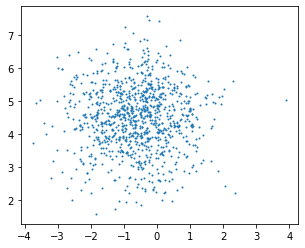

In [204]:
plot_blobs(blob_coords)

In [205]:
transform_matrix = np.array([
    [0.7, 1.5],
    [1, 0.3]])

In [206]:
X = blob_coords @ transform_matrix == blob_coords 

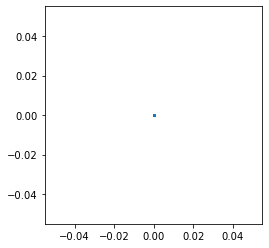

In [207]:
plot_blobs(X)

In [208]:
X = blob_coords @ transform_matrix 

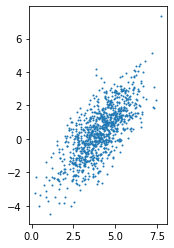

In [209]:
plot_blobs(X)

In [210]:
X.mean(axis = 0)

array([4.06723463, 0.41758611])

In [211]:
pca = PCA()

In [212]:
pca.fit(X)

PCA()

In [213]:
pca.components_

array([[ 0.58018628,  0.81448381],
       [-0.81448381,  0.58018628]])

In [214]:
pca.transform(X)

array([[-0.30303831,  0.60842617],
       [ 0.69670852,  0.1173525 ],
       [-1.91874023,  1.73105285],
       ...,
       [ 1.74871439, -0.3541609 ],
       [ 2.31241919, -0.52353706],
       [-2.28354305, -1.15678691]])

In [215]:
pca.explained_variance_ratio_

array([0.87385529, 0.12614471])

In [216]:
# first PC preserves 0.88 from data variance

In [217]:
pca.explained_variance_

array([3.43518532, 0.49588355])

In [218]:
v1 = pca.components_[0] * 2* np.sqrt(pca.explained_variance_[0])
v2 = pca.components_[1] * 2* np.sqrt(pca.explained_variance_[1])

In [219]:
v1, v2

(array([2.15066386, 3.01916979]), array([-1.1471027 ,  0.81712275]))

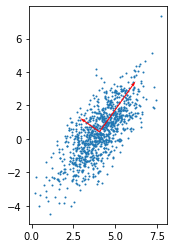

In [220]:
plt.scatter(X[:, 0], X[:, 1], s = 1)
plt.quiver([pca.mean_[0]], [pca.mean_[1]], [v1[0]], [v1[1]], scale_units = 'xy', angles = 'xy', scale = 1, color = 'red')
plt.quiver([pca.mean_[0]], [pca.mean_[1]], [v2[0]], [v2[1]], scale_units = 'xy', angles = 'xy', scale = 1, color = 'red')
plt.gca().set_aspect('equal')
plt.show()

In [221]:
pca.mean_

array([4.06723463, 0.41758611])

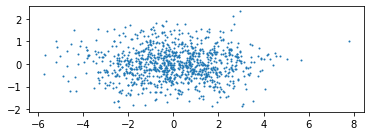

In [222]:
plot_blobs(pca.transform(X))

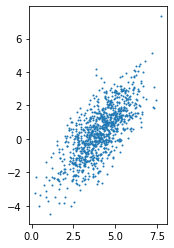

In [224]:
plot_blobs(pca.inverse_transform(pca.transform(X)))